#### Librerias

In [1]:
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
library(forecast)

ERROR: Error in library(forecast): there is no package called 'forecast'


# Datos a 3 años

In [15]:
df <- data.frame(read.csv('BitcoinHD-3Y.csv', header = TRUE, sep = ','))

In [27]:
df[,1:2]

ï..Date,Price
<chr>,<chr>
"Mar 17, 2021","58,913.5"
"Mar 16, 2021","56,889.7"
"Mar 15, 2021","55,791.3"
"Mar 14, 2021","59,113.7"
"Mar 13, 2021","61,195.3"
"Mar 12, 2021","57,265.1"
"Mar 11, 2021","57,799.5"
"Mar 10, 2021","55,851.9"
"Mar 09, 2021","54,879.0"


In [9]:
help(ts)

### Exploracion de los datos

In [6]:
start(data$price)
end(data$price)

ERROR: Error in data$price: $ operator is invalid for atomic vectors


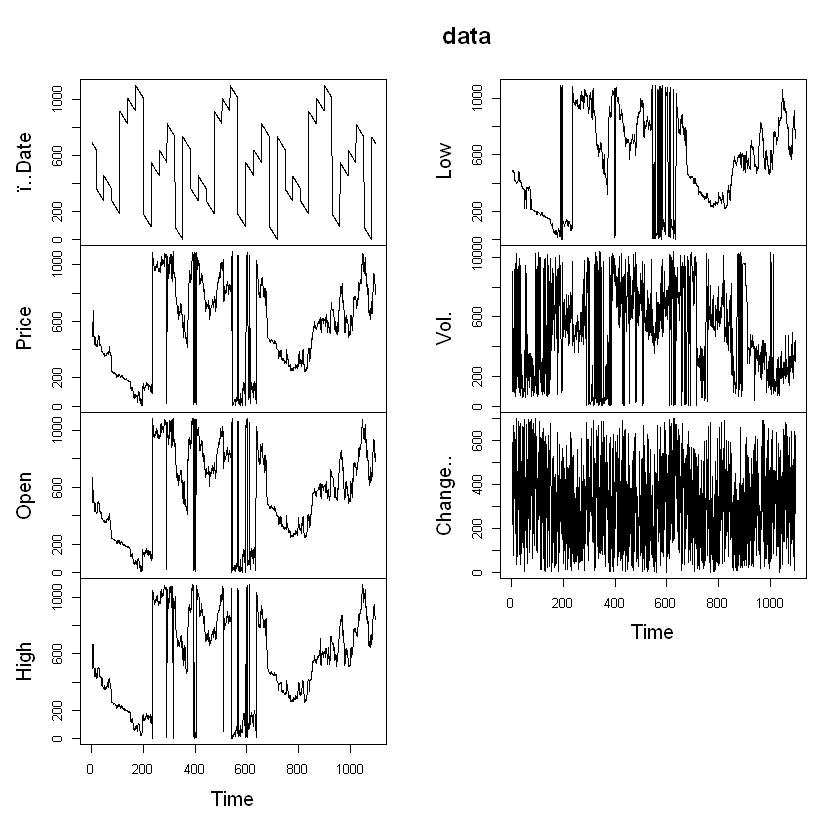

In [5]:
plot(data)

Tendencia y Varianza

In [ ]:
summary(lm(data~time(data)))

In [ ]:
adf.test(data, alternative = "stationary")

Correciones

In [ ]:
Corr1 <- diff(data)

In [ ]:
plot(Corr1) #Corregir el zoom

Tendencia y Varianza

In [ ]:
summary(lm(Corr1~time(Corr1)))

In [ ]:
adf.test(Corr1, alternative = "stationary")

### Modelado

Modelo AR

In [ ]:
ar(Corr1)

In [ ]:
AIC(arima(Corr1, order = c(0,0,0), method = 'ML'))

Modelo MA

In [ ]:
aux <- Inf
for(i in 1:15){
    if(AIC(arima(Corr1, order=c(0,0,i), method = 'ML')) < aux){
        aux <- AIC(arima(Corr1, order=c(0,0,i), method = 'ML'))
        MA.mejor <- i
    }
}
MA.mejor
aux

Modelo ARMA

In [ ]:
defaultW <- getOption("warn") 

options(warn = -1) 

In [ ]:
arma.aic <- Inf
for(j in 1:10){
    for(i in 1:10){
        if(AIC(arima(Corr1, order=c(j,0,i), method = 'ML')) < arma.aic){
            arma.aic <- AIC(arima(Corr1, order=c(j,0,i), method = 'ML'))
            ARMA.mejor <- c(j,i)
        }
    }
}
ARMA.mejor
arma.aic

In [ ]:
options(warn = defaultW)

### Ruido Blanco

Ruido blanco de residuales

In [ ]:
Res <- residuals(arima(Corr1, order = c(0,0,0), method = 'ML'))

Media

In [ ]:
mean(Res)

Varianza constante

In [ ]:
plot(Res,
    type = 'p')

Incorrelacion

In [ ]:
acf(Res)

In [ ]:
pacf(Res)